geochecking debby's stations

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
whos

Interactive namespace is empty.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from oct2py import octave
import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import cmocean
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

In [5]:
#============================================================================#
#                              LOAD DATA                                     #
#============================================================================#
infil = np.loadtxt('./DATASETS/grl2016.raw')

crid = infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
lat = infil[:,6]
lon = infil[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:,20]
po4 = infil[:,21]
po4_qf = infil[:,22]
pH_obs = infil[:,23]
pH_obs_qf = infil[:,24]

In [6]:
#============================================================================#
#                         CREATE DATA MASKS                                  #
#============================================================================#

ox_qc = ((ox_qf == 2) | (ox_qf == 6)) &  (ox > 0.0)
dic_qc = ((dic_qf == 2) | (dic_qf == 6) | (dic_qf == 10)) & (dic > 0.0)
alk_qc = ((alk_qf == 2) | (alk_qf == 6) | (alk_qf == 10)) & (alk > 0.0)
no3_qc = ((no3_qf == 2) | (no3_qf == 6)) & (no3 > 0.0)
si_qc = ((si_qf == 2) | (si_qf == 6)) & (si> 0.0)
po4_qc = ((po4_qf == 2) | (po4_qf == 6)) & (po4 > 0.0)

carb_pair_qc = ( ((dic_qf == 2) & (alk_qf == 2)) | ((dic_qf == 6) & (alk_qf == 6)) | 
                  ((dic_qf == 12) & (alk_qf == 10)) | ((dic_qf == 10) & (alk_qf == 12)) |
                  ((dic_qf == 10) & (alk_qf == 10)) )

#

# mask for CO2SYS
#msk_C = dic_qc & alk_qc & po4_qc & si_qc
msk_C = carb_pair_qc & po4_qc & si_qc
#msk_C = po4_qc & si_qc 

#msk for plotting just alk and just dic
# all data
msk_dic = dic_qc 
msk_alk = alk_qc 
msk_ox = ox_qc 


In [7]:

########################################
#create the CO2SYS vectors - the max size for the omega and pH vectors

S_C   = S[msk_C]
T_C   = T[msk_C]
P_C   = P[msk_C]
ox_C  = ox[msk_C]
ox_qf_C = ox_qf[msk_C]
dic_C = dic[msk_C] 
alk_C = alk[msk_C]

no3_C =  no3[msk_C]
no3_qf_C = no3_qc[msk_C]
si_C = si[msk_C]
#si_qf_C = si_qf[msk_C]
po4_C = po4[msk_C]
#po4_qf_C = po4_qc[msk_C]
crid_C = crid[msk_C]
stn_C = stn[msk_C]
ln_C = ln[msk_C]

## these are masks
ln_in_CPE_C = (ln_C == -1)
ln_in_north_C = (ln_C == 1)
ln_in_south_C = (ln_C == 2)
ln_in_fraser_C = (ln_C == 3)
ln_in_haro_C = (ln_C == 4)
ln_in_jdf_C = (ln_C == 5)

##masks for non_C
## these are masks
ln_in_CPE = (ln == -1)
ln_in_north = (ln == 1)
ln_in_south = (ln == 2)
ln_in_fraser = (ln == 3)
ln_in_haro = (ln == 4)
ln_in_jdf = (ln == 5)

In [8]:
print('!MASK LOGIC CHECK!')
print('stations in the north')
print(stn[ln_in_north])
print('stations in the north that have C data')
print(stn[ln_in_north_C])
print('stations in the south that have C data')
print(stn[ln_in_south_C])
print('there is something wrong with the ln_C mask!')

!MASK LOGIC CHECK!
stations in the north
[ 14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5
  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5
  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5
  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5
  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5
  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  12.
  12.   12.   12.   12.   12.   12.   12.   12.   12.   12.   12.   12.
  12.   12.   12.   14.   14.   14.   14.   14.   14.   14.   14.   14.
  14.   14.   14.   14.   14.   14.   12.   12.   12.   12.   12.   12.
  12.   12.   12.   12.   12.   12.   12.   12.   12.   12.   14.   14.
  14.   14.   14.   14.   14.   14.   14.   14.   14.   14.   14.   14.
  14.   14.   14.   12.   12.   12.   12.   12.   12.   12.   12.   12.
  12.   12.   12.   12.   12.   12.   12.   12.   12.   12.   12.   12.
  12.   12.   12. 

/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 860 but corresponding boolean dimension is 415
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 860 but corresponding boolean dimension is 415


In [9]:

print('how many CPE data?', len(lon[ln_in_CPE]))
print('how many northern data?', len(lon[ln_in_north]))
print('how many southern data? ', len(lon[ln_in_south]))
print('how many fraser data?', len(lon[ln_in_fraser]))
print('how many haro data? ', len(lon[ln_in_haro]))
print('how many jdf data?', len(lon[ln_in_jdf]))
print('****')
print('how many C data total?', len(lon))


how many CPE data? 0
how many northern data? 275
how many southern data?  332
how many fraser data? 0
how many haro data?  79
how many jdf data? 174
****
how many C data total? 860


In [10]:

print('how many CPE data? (with C)', len(lon[ln_in_CPE_C]))
print('how many northern data? (with C)', len(lon[ln_in_north_C]))
print('how many southern data? (with C)', len(lon[ln_in_south_C]))
print('how many fraser data? (with C)', len(lon[ln_in_fraser_C]))
print('how many haro data? (with C)', len(lon[ln_in_haro_C]))
print('how many jdf data? (with C)', len(lon[ln_in_jdf_C]))
print('****')
print('how many C data total?', len(lon[msk_C]))


how many CPE data? (with C) 0
how many northern data? (with C) 115
how many southern data? (with C) 162
how many fraser data? (with C) 0
how many haro data? (with C) 38
how many jdf data? (with C) 100
****
how many C data total? 415


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 860 but corresponding boolean dimension is 415
  from ipykernel import kernelapp as app
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 860 but corresponding boolean dimension is 415
  app.launch_new_instance()
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 860 but corresponding boolean dimension is 415
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 860 but corresponding boolean dimension is 415
/home/tjarniko/anaconda3/li

In [11]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

nav_lon = mesh.variables['nav_lon'][:]
nav_lat = mesh.variables['nav_lat'][:]
bathy = mesh.variables['Bathymetry'][:]
    

Number of points plotted 860
stations which appear to be on land
[39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 42.0, 42.0, 42.0

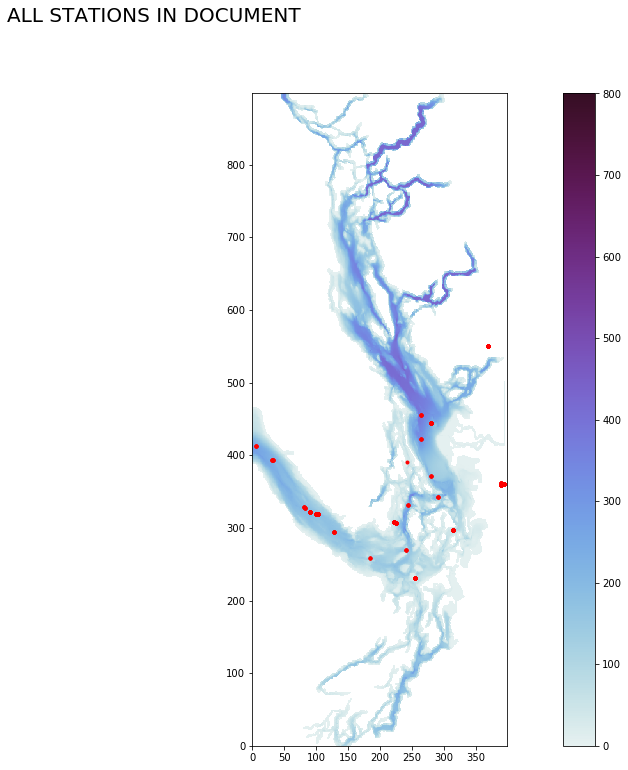

In [12]:

pts_all = len(lon)
print('Number of points plotted', pts_all)

stnlist = []
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.dense, vmin = 0, vmax = 800)
for w in range(0,pts_all):
    j, i = geo_tools.find_closest_model_point(lon[w],lat[w],nav_lon,nav_lat)
    if i>340 :
        q = stn[w]
        stnlist.append(q)

    ax.plot(i,j,'r.')
fig.colorbar(mesh)
plt.suptitle('ALL STATIONS IN DOCUMENT',fontsize=20)

print('stations which appear to be on land')
print(stnlist)

Number of points plotted 415
stations which appear to be on land
[39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 39.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 59.0, 59.0, 59.0, 102.0, 102.0, 102.0, 102.0, 102.0, 75.0, 75.0, 75.0, 75.0, 75.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 14.0, 14.0, 14.0, 14.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 12.0, 12.0, 12.0, 12.0, 12.0, 62.0, 62.0, 62.0, 75.0, 75.0, 75.0, 75.0, 75.0, 72.0, 72.0, 69.0, 69.0, 69.0, 42.0, 39.0, 39.0, 39.0, 39.0, 39.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0]


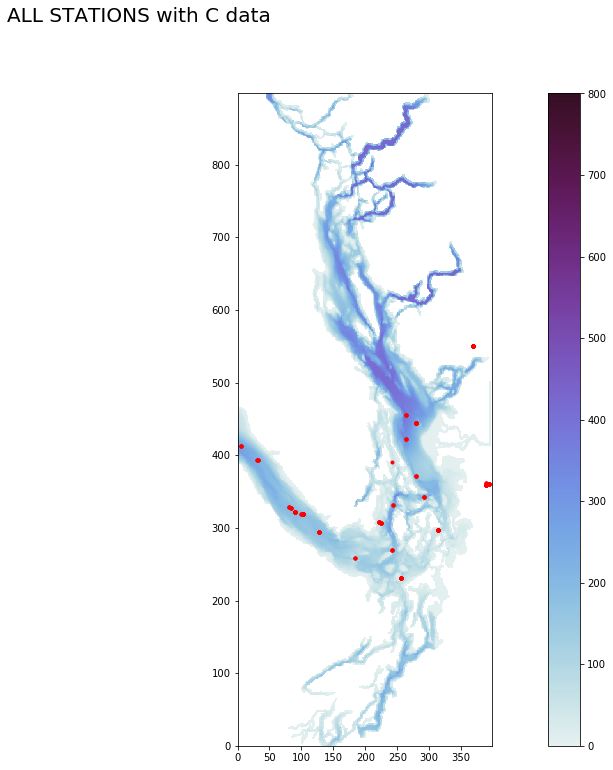

In [ ]:
lon_C = lon[msk_C]
lat_C = lat[msk_C]
pts_all = len(lon_C)
print('Number of points plotted', pts_all)

stnlist = []
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.dense, vmin = 0, vmax = 800)
for w in range(0,pts_all):
    j, i = geo_tools.find_closest_model_point(lon_C[w],lat_C[w],nav_lon,nav_lat)
    if i>340 :
        q = stn[w]
        stnlist.append(q)

    ax.plot(i,j,'r.')
fig.colorbar(mesh)
plt.suptitle('ALL STATIONS with C data',fontsize=20)

print('stations which appear to be on land')
print(stnlist)

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(25, 15), sharey=True)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
    
time_steps = (0,1,2,3,4,5)
for ax, t in zip(axs, time_steps):
    if t == 0 :

        mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.dense, vmin = 0, vmax = 800)
        ax.set_title('ALL DATA')
        plot_lon = lon
        plot_lat = lat
        pts_all = len(plot_lon)
        for w in range(0,pts_all):
            j, i = geo_tools.find_closest_model_point(plot_lon[w],plot_lat[w],nav_lon,nav_lat)
            ax.plot(i,j,'r.')
    if t == 1 :
        mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.dense, vmin = 0, vmax = 800)
        ax.set_title('DATA - C mask')
        plot_lon = lon[msk_C]
        plot_lat = lat[msk_C]
        pts_all = len(plot_lon)
        for w in range(0,pts_all):
            j, i = geo_tools.find_closest_model_point(plot_lon[w],plot_lat[w],nav_lon,nav_lat)
            ax.plot(i,j,'r.')
        viz_tools.set_aspect(ax)
    if t == 2 :
        mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.dense, vmin = 0, vmax = 800)
        ax.set_title('DATA -  North S')
        plot_lon = lon[ln_in_north]
        plot_lat = lat[ln_in_north]
        pts_all = len(plot_lon)
        for w in range(0,pts_all):
            j, i = geo_tools.find_closest_model_point(plot_lon[w],plot_lat[w],nav_lon,nav_lat)
            ax.plot(i,j,'r.')
    if t == 3 :
        mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.dense, vmin = 0, vmax = 800)
        ax.set_title('DATA  - South S')
        plot_lon = lon[ln_in_south]
        plot_lat = lat[ln_in_south]
        pts_all = len(plot_lon)
        for w in range(0,pts_all):
            j, i = geo_tools.find_closest_model_point(plot_lon[w],plot_lat[w],nav_lon,nav_lat)
            ax.plot(i,j,'r.')
    if t == 4 :
        mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.dense, vmin = 0, vmax = 800)
        ax.set_title('DATA -  haro')
        plot_lon = lon[ln_in_haro]
        plot_lat = lat[ln_in_haro]
        pts_all = len(plot_lon)
        for w in range(0,pts_all):
            j, i = geo_tools.find_closest_model_point(plot_lon[w],plot_lat[w],nav_lon,nav_lat)
            ax.plot(i,j,'r.')
    if t == 5 :
        mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.dense, vmin = 0, vmax = 800)
        ax.set_title('DATA -  jdf')
        plot_lon = lon[ln_in_jdf]
        plot_lat = lat[ln_in_jdf]
        pts_all = len(plot_lon)
        for w in range(0,pts_all):
            j, i = geo_tools.find_closest_model_point(plot_lon[w],plot_lat[w],nav_lon,nav_lat)
            ax.plot(i,j,'r.')

    viz_tools.set_aspect(ax)
    cbar = fig.colorbar(mesh, ax=ax)



